<a href="https://colab.research.google.com/github/RamirezCazaresCristianOmar/M-todos-Num-ricos-1/blob/main/Polinomio_Osculante_de_Hermite_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import Symbol, expand, Matrix
from sympy.plotting import plot
import matplotlib.pyplot as plt

Polinomio osculante de Hermite:
-0.00277469135798944*x**5 + 0.0240317901231809*x**4 - 0.0145560802460553*x**3 - 0.235216169754413*x**2 - 0.00822922345577151*x + 1.00194406469105

Tabla de diferencias divididas:
['zi', 'f(z)', 'Primeras DD', 'Segundas DD', 'Terceras DD', 'Cuartas DD']
[1.3, 0.620086000000000, '', '', '', '']
[1.3, 0.620086000000000, -0.522023200000000, '', '', '']
[1.6, 0.455402200000000, -0.548946000000000, -0.0897426666666667, '', '']
[1.6, 0.455402200000000, -0.569895900000000, -0.0698329999999999, 0.0663655555555562, '']
[1.9, 0.281818600000000, -0.578612000000000, -0.0290536666666678, 0.0679655555555535, 0.00266666666666216]
[1.9, 0.281818600000000, -0.581157100000000, -0.00848366666666545, 0.0685666666666746, 0.00100185185186850, -0.00277469135798944]

Valor en x = 1.5: 0.5118277017283953


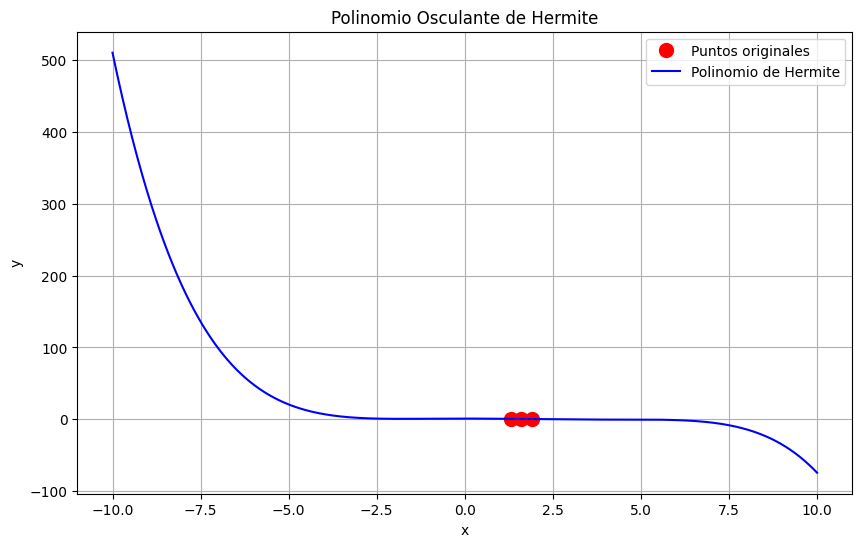

In [2]:
def hermite_osculante(xi, fi, fpi):
    """
    Calcula el polinomio osculante de Hermite usando diferencias divididas.

    Parámetros:
    xi (list): Lista de puntos (nodos) x.
    fi (list): Lista de valores de la función f(x) en los puntos xi.
    fpi (list): Lista de valores de la derivada de la función f'(x) en los puntos xi.

    Devuelve:
    - Polinomio osculante de Hermite (expresión simbólica)
    - Tabla de diferencias divididas
    - Vector de nodos duplicados
    - Tabla formateada para mostrar
    """
    n = len(xi) # Número de puntos dados

    # Crear una tabla de diferencias divididas (2n x 2n)
    tabla = Matrix.zeros(2 * n, 2 * n)
    z = [0] * (2 * n) # Vector de nodos duplicados

    # Inicializar los valores de la tabla con f(xi) y f'(xi)
    for i in range(n):
        z[2 * i] = z[2 * i + 1] = xi[i] # Duplicar cada nodo
        tabla[2 * i, 0] = tabla[2 * i + 1, 0] = fi[i] # Valores de la función
        tabla[2 * i + 1, 1] = fpi[i] # Valores de la derivada
        if i > 0:
            # Calcular las primeras diferencias divididas
            tabla[2 * i, 1] = (tabla[2 * i, 0] - tabla[2 * i - 1, 0]) / (z[2 * i] - z[2 * i - 1])

    # Llenar las diferencias divididas superiores
    for i in range(2, 2 * n):
        for j in range(2, i + 1):
            if z[i] == z[i - j]:
                # Si los puntos son repetidos, usar la derivada
                tabla[i, j] = fpi[i // 2]
            else:
                # Caso general de diferencias divididas
                tabla[i, j] = (tabla[i, j - 1] - tabla[i - 1, j - 1]) / (z[i] - z[i - j])

    # Construir el polinomio usando las diferencias divididas
    x = Symbol('x')
    polinomio = tabla[0, 0]
    termino = 1

    for i in range(1, 2 * n):
        termino *= (x - z[i-1])
        polinomio += tabla[i, i] * termino

    # Construir la tabla de resultados para mostrar
    encabezados = ["zi", "f(z)", "Primeras DD", "Segundas DD", "Terceras DD", "Cuartas DD"]
    tabla_hermite = [encabezados]
    for i in range(2 * n):
        fila = [z[i], tabla[i, 0]]
        for j in range(1, i + 1):
            fila.append(tabla[i, j])
        while len(fila) < len(encabezados):
            fila.append("")
        tabla_hermite.append(fila)

    return expand(polinomio), tabla, z, tabla_hermite

def evaluar_hermite(polinomio, x_eval):
    """
    Evalúa el polinomio de Hermite en un punto dado.

    Parámetros:
    polinomio: Polinomio de Hermite (expresión simbólica)
    x_eval: Punto donde evaluar el polinomio

    Retorna:
    float: Valor del polinomio en x_eval
    """
    x = Symbol('x')
    return float(polinomio.subs(x, x_eval))

def plot_hermite(xi, fi, polinomio, titulo="Polinomio Osculante de Hermite"):
    """
    Grafica los puntos originales y el polinomio de Hermite.

    Parámetros:
    xi: Lista de valores x
    fi: Lista de valores f(x)
    polinomio: Polinomio de Hermite (expresión simbólica)
    titulo: Título del gráfico
    """
    plt.figure(figsize=(10, 6))

    # Graficar puntos originales
    plt.plot(xi, fi, 'ro', label='Puntos originales', markersize=10)

    # Graficar el polinomio
    p = plot(polinomio, show=False)
    plt.plot(*p[0].get_points(), 'b-', label='Polinomio de Hermite')

    plt.grid(True)
    plt.title(titulo)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Ejemplo de uso
def ejemplo_hermite():
    """
    Ejemplo de uso del método de Hermite.
    """
    # Datos de ejemplo
    xi = [1.3, 1.6, 1.9]
    fi = [0.6200860, 0.4554022, 0.2818186]
    fpi = [-0.5220232, -0.5698959, -0.5811571]
    x_eval = 1.5

    # Calcular el polinomio de Hermite
    polinomio, tabla, z, tabla_hermite = hermite_osculante(xi, fi, fpi)

    # Mostrar el polinomio
    print("Polinomio osculante de Hermite:")
    print(polinomio)

    # Mostrar la tabla de diferencias divididas
    print("\nTabla de diferencias divididas:")
    for fila in tabla_hermite:
        print(fila)

    # Evaluar en x_eval
    valor = evaluar_hermite(polinomio, x_eval)
    print(f"\nValor en x = {x_eval}: {valor}")

    # Graficar
    plot_hermite(xi, fi, polinomio)

if __name__ == "__main__":
    ejemplo_hermite()